In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize
from scipy.misc import imresize

def band_to_array(band, resize_shape=None):
    band_arr =  np.reshape(np.array(band, dtype=np.float32), (75, 75))
    if resize_shape:
        if isinstance(resize_shape, int):
            resize_shape = (resize_shape, resize_shape)
        band_arr = imresize(band_arr, resize_shape)
    return band_arr   

# data exploration

## load data

In [3]:
train = pd.read_json('./asset/train.json', precise_float=True)
test = pd.read_json('./asset/test.json', precise_float=True)
# test_nat = pd.read_json('./assets/data/processed/test_natural.json', precise_float=True)
# test_nat = test[list(map(lambda x: len(str(x).split('.')[-1]) <= 4 , test['inc_angle']))]

In [5]:
train.head()

band_1  \
0  [-27.878361, -27.15416, -28.668615, -29.537971...   
1  [-12.242375, -14.920305, -14.920363, -12.66633...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [6]:
print(train.shape)
print(test.shape)

(1604, 5)
(8424, 4)


## statistic

(array([851.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 753.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

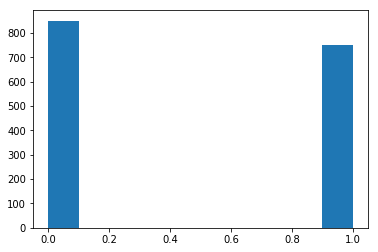

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(train['is_iceberg'])

(array([8.950000e+02, 2.248730e+05, 4.795588e+06, 3.844247e+06,
        1.048680e+05, 3.377100e+04, 1.468900e+04, 3.287000e+03,
        2.510000e+02, 3.100000e+01]),
 array([-45.655499 , -39.0745242, -32.4935494, -25.9125746, -19.3315998,
        -12.750625 ,  -6.1696502,   0.4113246,   6.9922994,  13.5732742,
         20.154249 ]),
 <a list of 10 Patch objects>)

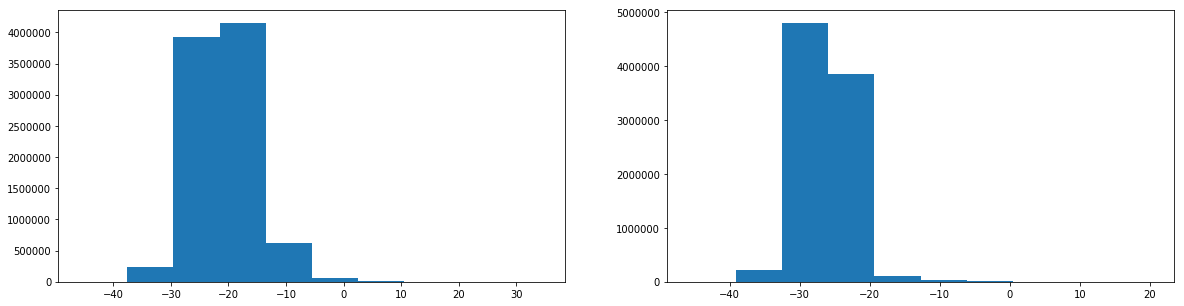

In [8]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.hist(np.array(train['band_1'].tolist()).flatten())
fig.add_subplot(122)
plt.hist(np.array(train['band_2'].tolist()).flatten())

In [10]:
from scipy.stats import describe
def print_summary_stats(df):
    print(describe(np.array(df['band_1'].tolist()).flatten()))
    print(describe(np.array(df['band_2'].tolist()).flatten()))

print_summary_stats(train)
print_summary_stats(test)

DescribeResult(nobs=9022500, minmax=(-45.594448, 34.574917), mean=-20.655830959107355, variance=27.04871827154699, skewness=0.815197502721379, kurtosis=2.8641548182554564)
DescribeResult(nobs=9022500, minmax=(-45.655499, 20.154249), mean=-26.320701804264864, variance=11.52954348185488, skewness=1.1749013201064424, kurtosis=7.556041412479731)
DescribeResult(nobs=47385000, minmax=(-45.680545806884766, 37.090523), mean=-22.44550520353285, variance=28.174073753199067, skewness=0.8819557448003297, kurtosis=2.392637229432249)
DescribeResult(nobs=47385000, minmax=(-49.0835, 37.09052276611328), mean=-24.693380698518308, variance=21.986545626253314, skewness=1.252519839695781, kurtosis=3.8380455829431135)


## explore incidence angle

### training set

In [11]:
from collections import Counter
for tuple in Counter(train['inc_angle'].tolist()).most_common():
    print(tuple)

('na', 133)
(34.4721, 23)
(42.5591, 16)
(36.1061, 15)
(33.6352, 15)
(39.234, 13)
(39.2166, 11)
(39.9784, 11)
(45.2814, 11)
(38.4755, 11)
(42.559, 10)
(45.2859, 10)
(34.4709, 10)
(39.2325, 9)
(40.7118, 9)
(34.4718, 9)
(37.6877, 9)
(35.7863, 9)
(38.4591, 9)
(40.7129, 9)
(38.0736, 8)
(35.2957, 8)
(37.6866, 8)
(42.5644, 7)
(43.2611, 7)
(36.9034, 7)
(40.3904, 7)
(38.8594, 7)
(35.2954, 6)
(37.2802, 6)
(40.7177, 6)
(42.5598, 6)
(35.2945, 6)
(33.635, 6)
(34.9664, 6)
(42.5128, 6)
(35.7829, 6)
(33.634, 6)
(43.9459, 6)
(44.6239, 5)
(40.3944, 5)
(45.2909, 5)
(40.3958, 5)
(38.02, 5)
(44.6246, 5)
(35.6291, 5)
(43.256, 5)
(42.5145, 5)
(38.4752, 5)
(39.6636, 4)
(38.9177, 4)
(43.2159, 4)
(41.8664, 4)
(45.2393, 4)
(38.8537, 4)
(39.6261, 4)
(36.9052, 4)
(38.4741, 4)
(41.4386, 4)
(44.5984, 4)
(43.946, 4)
(45.2853, 4)
(39.9844, 4)
(43.9409, 4)
(38.0144, 4)
(38.4608, 4)
(41.8582, 4)
(32.265, 3)
(38.2635, 3)
(42.5075, 3)
(38.1366, 3)
(39.2337, 3)
(34.0467, 3)
(37.6894, 3)
(43.9873, 3)
(42.4133, 3)
(44.5876, 

#### remove labeling noise

In [13]:
for angle in list(set(train['inc_angle'].tolist())):
    train_certain_angle = train[train['inc_angle'] == angle]
    if not np.all(train_certain_angle['is_iceberg'] == train_certain_angle['is_iceberg'].iloc[0]):
        print(angle)

41.8664
45.2851
42.5577
38.0144
43.2697
43.9392


In [15]:
train_dc = train.copy()

In [19]:
for angle in [41.8664, 45.2851, 42.5577, 38.0144, 43.2697, 43.9392]:
    print(angle)
    print(train_dc[train_dc['inc_angle'] == angle]['is_iceberg'])

41.8664
274    1
514    1
678    1
867    0
Name: is_iceberg, dtype: int64
45.2851
1156    0
1379    1
Name: is_iceberg, dtype: int64
42.5577
1098    0
1210    1
Name: is_iceberg, dtype: int64
38.0144
594     1
767     1
993     0
1193    1
Name: is_iceberg, dtype: int64
43.2697
517     0
1060    1
1112    1
Name: is_iceberg, dtype: int64
43.9392
1040    1
1245    0
Name: is_iceberg, dtype: int64


In [20]:
# modify into which class 3 of 4 examples are
train_dc.loc[train['inc_angle'] == 41.8664, 'is_iceberg'] = 1
train_dc.loc[train['inc_angle'] == 38.0144, 'is_iceberg'] = 1

In [21]:
# drop exmaples other examples
print(train_dc.shape)
drop_incangles = [45.2851, 42.5577, 43.2697, 43.9392]
train_dc = train_dc[list(map(lambda x : not x in drop_incangles, train_dc['inc_angle']))]
print(train_dc.shape)

(1604, 5)
(1595, 5)


### test set

In [22]:
from collections import Counter
for tuple in Counter(test['inc_angle'].tolist()).most_common():
    print(tuple)

(34.4721, 36)
(42.5591, 34)
(39.9784, 33)
(33.6352, 31)
(39.2166, 28)
(33.635, 28)
(39.2325, 26)
(34.4718, 26)
(45.2859, 24)
(39.234, 22)
(34.4709, 22)
(38.0736, 21)
(41.4386, 21)
(38.4591, 21)
(38.8537, 21)
(37.6877, 19)
(36.1061, 19)
(35.7863, 18)
(40.7177, 18)
(33.634, 17)
(38.8594, 17)
(43.9459, 16)
(34.1271, 15)
(36.1079, 15)
(40.7118, 14)
(40.3904, 14)
(35.2945, 14)
(33.6383, 13)
(42.5145, 13)
(36.1058, 13)
(42.559, 13)
(37.2294, 12)
(42.5598, 12)
(35.2957, 12)
(45.2909, 12)
(38.458, 12)
(40.7129, 12)
(45.2814, 12)
(38.4608, 12)
(37.2802, 12)
(36.9022, 12)
(35.7829, 11)
(44.6246, 11)
(36.4565, 10)
(38.4752, 10)
(44.6239, 10)
(39.2337, 10)
(39.9796, 10)
(43.2611, 10)
(43.9854, 9)
(42.5644, 9)
(36.4332, 9)
(39.545, 9)
(39.9798, 9)
(37.6866, 8)
(36.4792, 8)
(36.1091, 8)
(42.5128, 8)
(36.1049, 8)
(37.2598, 8)
(36.9034, 8)
(42.5642, 8)
(35.6623, 8)
(38.02, 7)
(33.638, 7)
(44.624, 7)
(35.2954, 7)
(34.8331, 7)
(33.6523, 7)
(39.2178, 7)
(44.6196, 7)
(34.9664, 7)
(44.4459, 7)
(41.4339, 6)

(38.622715931490376, 1)
(42.30282223949793, 1)
(41.8651, 1)
(40.82261665492303, 1)
(46.00565383091357, 1)
(46.57258745168094, 1)
(47.31688676689134, 1)
(45.104234829096214, 1)
(40.01023516136591, 1)
(35.243659118224755, 1)
(41.31306354907291, 1)
(44.53984673524802, 1)
(39.5923, 1)
(42.013707790760485, 1)
(40.57647720876312, 1)
(41.24811584148308, 1)
(35.34884136062876, 1)
(40.090437141048405, 1)
(41.58415608326512, 1)
(36.220390493668404, 1)
(37.13481059668528, 1)
(36.568934380524155, 1)
(47.218172894306726, 1)
(41.7748, 1)
(36.41789870248473, 1)
(39.94701777460545, 1)
(37.29780836161957, 1)
(43.31006870396159, 1)
(41.80292374324163, 1)
(44.76635336077232, 1)
(37.45844207190163, 1)
(37.3393, 1)
(40.56849970577894, 1)
(43.2698, 1)
(36.18224235706901, 1)
(40.813335923862574, 1)
(36.97108129760816, 1)
(34.68718845719229, 1)
(43.043414531857316, 1)
(38.44452217803398, 1)
(35.90650999954192, 1)
(36.28132194802552, 1)
(38.995561762402154, 1)
(36.47388730321357, 1)
(47.460548601588634, 1)
(35

(45.626469480312295, 1)
(34.64719498516509, 1)
(32.19, 1)
(34.58832197239131, 1)
(41.0243, 1)
(44.4619, 1)
(48.531065846653675, 1)
(40.557505371564304, 1)
(41.75023282260528, 1)
(44.98696714959487, 1)
(35.80888279193298, 1)
(43.47763699126949, 1)
(42.41467855953387, 1)
(40.5264, 1)
(33.4975010328273, 1)
(46.98547521485566, 1)
(36.50816466508521, 1)
(34.68508358474945, 1)
(43.82905300699352, 1)
(45.6740200992653, 1)
(38.7516, 1)
(33.276018942271605, 1)
(42.59077317327512, 1)
(39.899682443399456, 1)
(42.5839, 1)
(34.47416599086472, 1)
(40.43937720383365, 1)
(38.78506719200523, 1)
(41.17448871001942, 1)
(36.01827982438008, 1)
(37.2721954286815, 1)
(40.2466, 1)
(38.80682829160829, 1)
(42.94802199174498, 1)
(33.67138189305804, 1)
(45.17583344832331, 1)
(47.18538378699514, 1)
(42.5432, 1)
(35.03389738387631, 1)
(45.793826129319044, 1)
(48.985882947626564, 1)
(38.7843, 1)
(47.024586309490644, 1)
(37.53738214200375, 1)
(38.581315625771346, 1)
(45.628999946059615, 1)
(36.97031700735937, 1)
(42.

#### leakage: drop machine generated images

In [23]:
natural_mask = list(map(lambda x: (len(str(x)) < 8) or (str(x)[-6:]=='000004'), test['inc_angle']))
test_natural = test[natural_mask]
test_machine = test[[not b for b in natural_mask]]

## show snippet

In [24]:
N_ROW = 6
N_COL = 6
N = N_ROW * N_COL
icebergs = train[train['is_iceberg']==1].sample(n=N, random_state=2017)
ships = train[train['is_iceberg']==0].sample(n=N, random_state=2017)

### iceberg

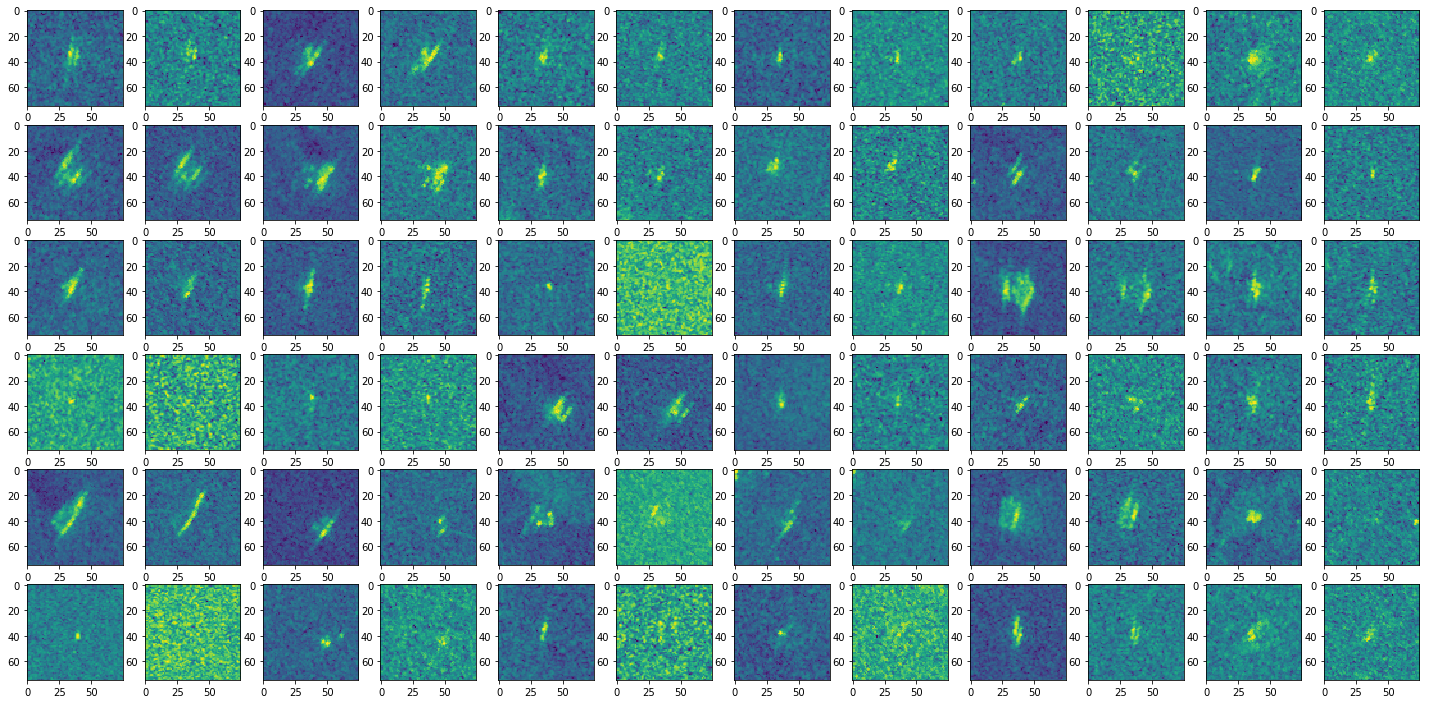

In [25]:
fig = plt.figure(1,figsize=(25,25))
for j in range(2*N):
    i = j // 2 
    b = j % 2
    ax = fig.add_subplot(2*N_ROW,2*N_COL,j+1)
    arr = np.reshape(np.array(icebergs.iloc[i,b]),(75,75))
    ax.imshow(arr)
    
plt.show()

### ships

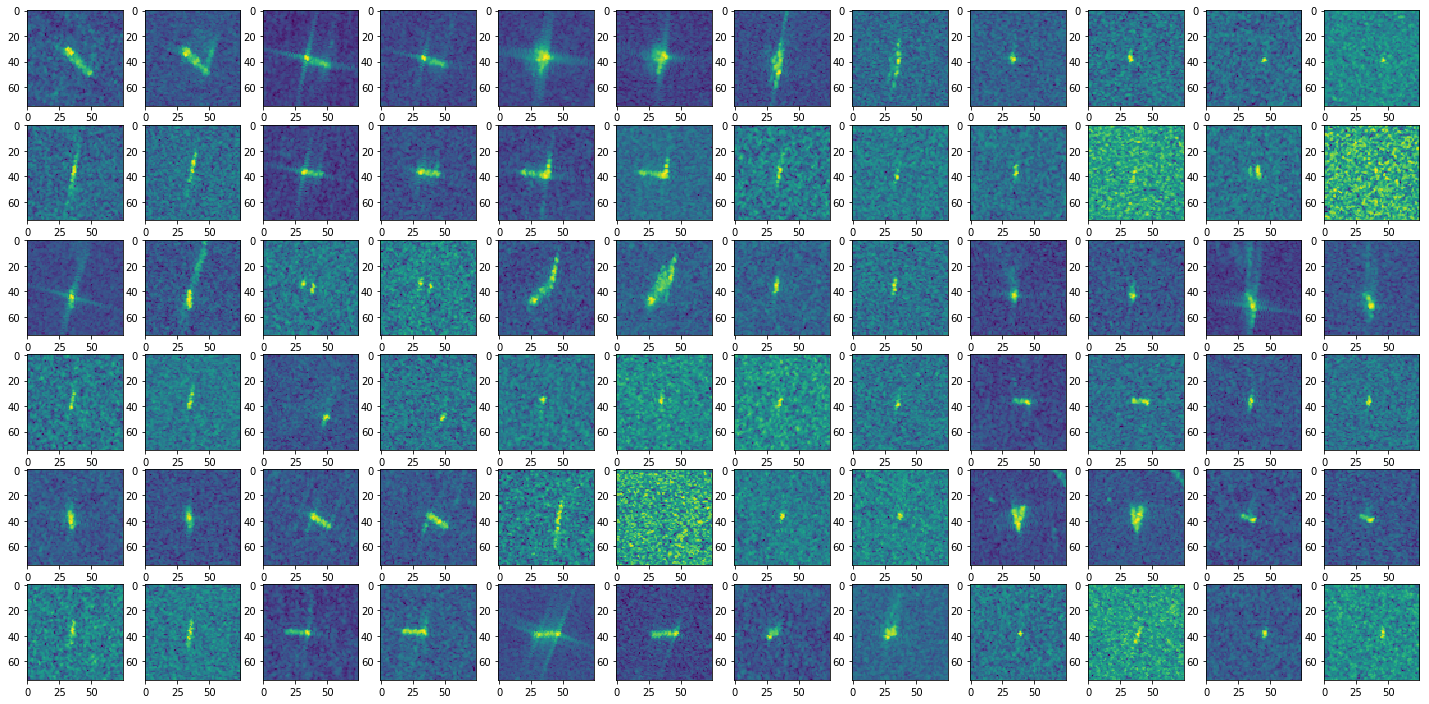

In [26]:
fig = plt.figure(1,figsize=(25,25))
for j in range(2*N):
    i = j // 2 
    b = j % 2
    ax = fig.add_subplot(2*N_ROW,2*N_COL,j+1)
    arr = np.reshape(np.array(ships.iloc[i,b]),(75,75))
    ax.imshow(arr)
    
plt.show()

### test (natural)

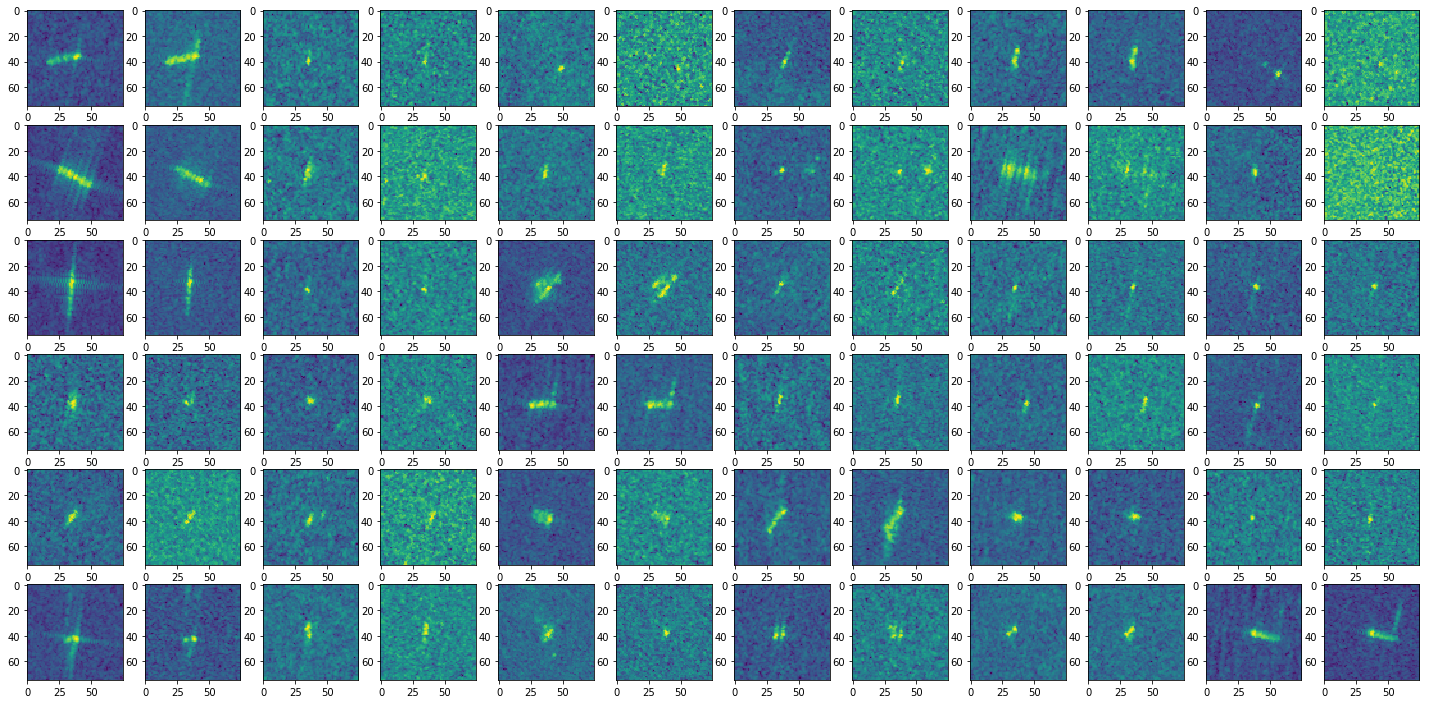

In [27]:
test_natural_sample = test_natural.sample(n=N)
fig = plt.figure(1,figsize=(25,25))
for j in range(2*N):
    i = j // 2 
    b = j % 2
    ax = fig.add_subplot(2*N_ROW,2*N_COL,j+1)
    arr = np.reshape(np.array(test_natural_sample.iloc[i,b]),(75,75))
    ax.imshow(arr)
    
plt.show()

### test (machine-generated)

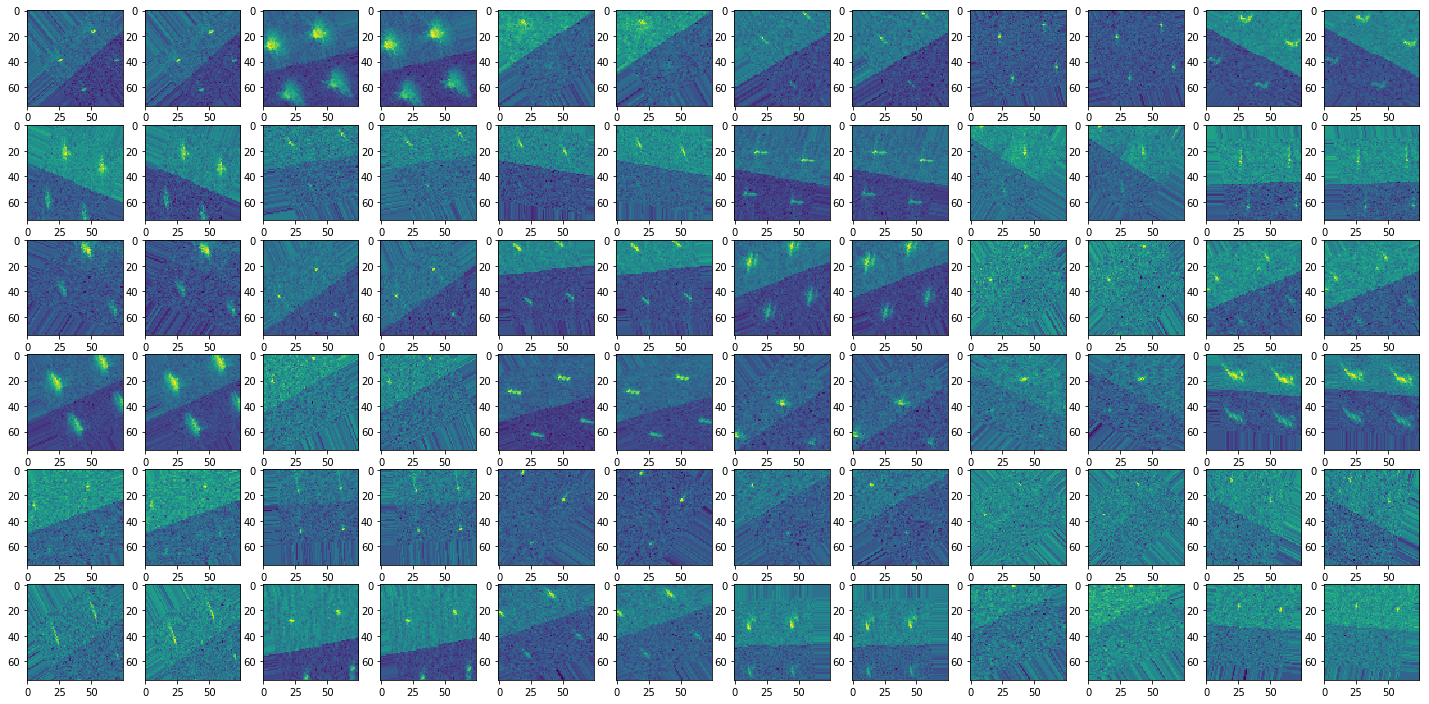

In [28]:
test_machine_sample = test_machine.sample(n=N)
fig = plt.figure(1,figsize=(25,25))
for j in range(2*N):
    i = j // 2 
    b = j % 2
    ax = fig.add_subplot(2*N_ROW,2*N_COL,j+1)
    arr = np.reshape(np.array(test_machine_sample.iloc[i,b]),(75,75))
    ax.imshow(arr)
    
plt.show()

# Classification

In [29]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch import nn
from torch import optim

## define model

In [32]:
class StatoilNet(torch.nn.Module):
    def __init__(self):
        super(StatoilNet, self).__init__()
        self.features = nn.Sequential(nn.Conv2d(2, 256, 3, padding=1),
                                      nn.Conv2d(256, 128, 3, padding=1),
                                      nn.BatchNorm2d(128),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, padding=1),
                                      nn.Dropout2d(),
                                      nn.Conv2d(128, 128, 3, padding=1),
                                      nn.Conv2d(128, 64, 3, padding=1),
                                      nn.BatchNorm2d(64),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, padding=1),
                                      nn.Dropout2d(),
                                      nn.Conv2d(64, 64, 3, padding=1),
                                      nn.Conv2d(64, 32, 3, padding=1),
                                      nn.BatchNorm2d(32),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, padding=1),
                                      nn.Dropout2d(),
                                      nn.Conv2d(32, 32, 3, padding=1),
                                      nn.Conv2d(32, 16, 3, padding=1),
                                      nn.BatchNorm2d(16),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, padding=1),
                                      nn.Dropout2d()
                                     )
                        

        self.classifier = nn.Linear(400, 2)
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size()[0], -1)
        return self.classifier(x)

In [33]:
test_model = StatoilNet()
test_model(Variable(torch.from_numpy(np.zeros((1,2,60,60))).float()))

Variable containing:
-0.8377 -0.6282
[torch.FloatTensor of size 1x2]

## define function to run one epoch 

In [ ]:
def run_one_epoch(model, dl, criterion, train=False, optimizer=None):
    
    losssum_epoch = []
    preds_epoch = []
    labels_epoch = []
    
    if train:
        model.train()
    else:
        model.eval()
    
    for images, labels in dl:
        labels = Variable(labels.cuda(), volatile=(not train))
        images = Variable(images.cuda(), volatile=(not train))
        if len(images.size()) == 5: # for multiple-crop evaluation
            bs, ncrops, c, h, w = images.size()
            outputs = model(images.view(-1, c, h, w))
            outputs = outputs.view(bs, ncrops, -1).mean(1)
        else:
            outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        
        if train:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        losssum_epoch += [loss.data[0] * labels.size(0)]
        preds_epoch += preds.data.tolist()
        labels_epoch += labels.data.tolist()
    
    return losssum_epoch, preds_epoch, labels_epoch 

## prepare data 

### split training / validation set

In [34]:
import random
from collections import Counter

class KFoldWithIncAngle(object):
    def __init__(self, df, K=10):
        self.df = df
        self.K = K
        self._init_split_idx()
        
    def _init_split_idx(self):
        self.split_idx = [0]
        self.angle_list = list(set(self.df['inc_angle']))
        #shuffle
        random.shuffle(self.angle_list)

        
        aglcnt_dict = {a:c for (a,c) in Counter(self.df['inc_angle']).most_common()}
        angle_stack = self.angle_list.copy()

        cnt = 0
        cnts = []
        idx = 0
        while len(angle_stack) > 0:
            cnt += aglcnt_dict[angle_stack.pop(0)]
            idx += 1
            if cnt > self.df.shape[0]//self.K:
                self.split_idx += [idx]
                cnts += [cnt]
                cnt = 0
        
        self.split_idx +=[idx]
        cnts += [cnt]
        
        # check if last fold is not too small
        
        if cnts[-1] > self.df.shape[0] // (self.K+2):
            for fidx, cnt in enumerate(cnts):
                print('Fold %02d validation set size: %d' % (fidx, cnt))
        else:
            print('last fold is too small. again splitting...')
            self._init_split_idx()
        
   
    def __iter__(self):
        self.fold_idx = 0
        return self
    
    def __next__(self):
        if self.fold_idx >= self.K:
            raise StopIteration
        else:
            val_mask = list(map(lambda x: x in self.angle_list[self.split_idx[self.fold_idx]: self.split_idx[self.fold_idx + 1]], 
                                self.df['inc_angle']))
            val_cv = self.df[val_mask]
            train_cv = self.df[[not b for b in val_mask]]
            self.fold_idx += 1
            return train_cv, val_cv

In [35]:
for train_cv, val_cv in KFoldWithIncAngle(train):
    print(train_cv.shape)
    print(val_cv.shape)

last fold is too small. again splitting...
Fold 00 validation set size: 162
Fold 01 validation set size: 168
Fold 02 validation set size: 164
Fold 03 validation set size: 161
Fold 04 validation set size: 161
Fold 05 validation set size: 161
Fold 06 validation set size: 161
Fold 07 validation set size: 164
Fold 08 validation set size: 161
Fold 09 validation set size: 141
(1442, 5)
(162, 5)
(1436, 5)
(168, 5)
(1440, 5)
(164, 5)
(1443, 5)
(161, 5)
(1443, 5)
(161, 5)
(1443, 5)
(161, 5)
(1443, 5)
(161, 5)
(1440, 5)
(164, 5)
(1443, 5)
(161, 5)
(1463, 5)
(141, 5)


### dataframe to numpy

In [38]:
def df_to_numpy(df, resize=None, to_tensor=False):
    X = [np.stack([band_to_array(df.iloc[i, 0], resize), 
                   band_to_array(df.iloc[i, 1], resize),
                   # for 3-channel
                   # (band_to_array(df.iloc[i, 0], resize) + band_to_array(df.iloc[i, 1], resize))/2]
                  ]
                  ,axis=2) for i in range(len(df))]
    X = np.array(X)
    if to_tensor:
        X = torch.from_numpy(X)
    if 'is_iceberg' in df:
        y = df['is_iceberg'].as_matrix()
        if to_tensor:
            y = torch.from_numpy(y)
    else:
        y = None
        
    return X, y

X, y = df_to_numpy(train_cv)
X_val, y_val = df_to_numpy(val_cv)

print(X.shape)
print(y.shape)
print(X_val.shape)
print(y_val.shape)


(1463, 75, 75, 2)
(1463,)
(141, 75, 75, 2)
(141,)


### generate dataloader

In [39]:
import sys
sys.path.append('pytorch/vision')
from pytorch.vision.dataset import NumpyDataset
from pytorch.vision.transform import Compose, ToTensor, HFlip, VFlip, Clahe, RandomFiveCrop, FiveCrop
from torchvision.transforms import Normalize, Lambda

tr_transform = [HFlip(), VFlip(), RandomFiveCrop(64), ToTensor()]
val_transform = [FiveCrop(64), 
                 Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops])),
                ]
dl_train = torch.utils.data.DataLoader(NumpyDataset(X, y, 2, transforms=tr_transform), batch_size=32, shuffle=True)
dl_val = torch.utils.data.DataLoader(NumpyDataset(X_val, y_val, 2, transforms=val_transform), batch_size=32, shuffle=False)


ImportError: No module named 'pytorch'

## run training

In [ ]:

model = StatoilNet()
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)

NUM_EPOCHS = 5000

for e in range(NUM_EPOCHS):
    
    losssum_epoch, preds_epoch, labels_epoch = run_one_epoch(model, dl_train, criterion, True, optimizer)

    avg_loss = sum(losssum_epoch)/len(labels_epoch)
    acc = sum([1  if preds_epoch[i]==labels_epoch[i] else 0 for i in range(len(labels_epoch))])/float(len(labels_epoch))
    
    losssum_val, preds_val, labels_val = run_one_epoch(model, dl_val, criterion)
    avg_loss_val = sum(losssum_val)/len(labels_val)
    acc_val = sum([1 if preds_val[i]==labels_val[i] else 0 for i in range(len(labels_val))])/float(len(labels_val))
    
    print('|  epoch %d | tr avg loss: %.6f | tr acc: %.6f | val avg loss: %.6f | vall acc: %.6f' % (e, avg_loss, acc, avg_loss_val, acc_val))

    